# [ tester ]

In [1]:
import fatbot as fb
import torch.nn as nn


### Environment

In [2]:
# create agent instance
def envF(mode):
    return fb.worlds.World_Test(                #<-------------- select fatbolt.World class
                mode=mode,                      #<-------------- mode based
                swarm=fb.swarms.swarm_4x1(),    #<-------------- select fatbot.Swarm instance
                horizon=500,                    #<-------------- set 0 for infinite horizon
                enable_imaging=True,            #<-------------- disbale if not required
                seed=None,                      #<-------------- rng seed
                custom_XY=None,                 #<-------------- custom XY-range if needed
                #<-------------- render args 
                render_xray_cmap='hot',
                render_dray_cmap='copper',
                render_dpi=48,
                render_figure_ratio=0.5,
                render_bounding_width=0.05,
            )

fb.check_env(envF(fb.RunMode.training)) #<--- stable_baseline.check_env

[*] World Created :: World@[swarm_4x] @ RunMode.training 
 Dim: ( X=40.0, Y=40.0, H=500 ),  Imaging: [True],  History: [False]


c:\Program Files\Python38\lib\site-packages\gym\spaces\box.py:73: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(


### Agent

In [3]:
# define agent class 

model_type = 'ppo'  #<---- SELECT [check fatbot.agents.MODEL_TYPES]

class testAgent(fb.Agent):

        
    def __init__(self, base_dir, envF) -> None:
        super().__init__(model_type, base_dir, envF)
        self.model_name = f'{str(__class__.__name__)}_{model_type}'
        print(f'Agent::{self.model_name}')

    def __call__(self, test=False, **testargs): #<--- trains on call
        return (self.default_test(**testargs) if test else self.default_train())

    def default_test(self, **testargs):
        return self.test(model_name = self.model_name, **testargs)

    def default_train(self):
        return self.train( #<--- will return a sb3 model

            model_name = self.model_name,

            learn_args = dict(total_timesteps = 10_000, log_interval = 100_000),

            model_args = dict(# env = ? #<----- do not provide env here
                            policy =                    'MlpPolicy',
                            learning_rate=              0.0003, # schedule
                            n_steps=                    2048, 
                            batch_size=                 64, 
                            n_epochs=                   10, 
                            gamma=                      0.99, 
                            gae_lambda=                 0.95, 
                            clip_range=                 0.2, # schedule
                            clip_range_vf=              None, # schedule
                            normalize_advantage=        True, 
                            ent_coef=                   0.0, 
                            vf_coef=                    0.5, 
                            max_grad_norm=              0.5, 
                            target_kl=                  None,
                            verbose=                    0, 
                            seed=                       None, 
                            device=                     'cpu', 
                            policy_kwargs=              dict(
                                                            activation_fn=nn.LeakyReLU,
                                                            net_arch=[dict(
                                                                pi=[256, 256, 256, 256], 
                                                                vf=[256, 256, 256, 256])])))
        
# create agent instance
agent = testAgent(base_dir='./', envF=envF)

Agent::testAgent_ppo


### Training

In [4]:
agent()

[Agent]:: Training: [testAgent_ppo]
[*] World Created :: World@[swarm_4x] @ RunMode.training 
 Dim: ( X=40.0, Y=40.0, H=500 ),  Imaging: [True],  History: [False]
[+] Start Training Model [ppo]@[./testAgent_ppo]
[x] Finished Training Model [ppo]@[./testAgent_ppo]


### Testing

[Agent]:: Testing: [testAgent_ppo] @ testAgent_ppo_run
[*] World Created :: World@[swarm_4x] @ RunMode.no_hist 
 Dim: ( X=40.0, Y=40.0, H=500 ),  Imaging: [True],  History: [False]
[RenderHandler]:: Reseting environment for first render...
[RenderHandler]:: Started Video @ [./testAgent_ppo_run.avi] :: Size [1600 x 960]

[++] Begin Epoch: Running for 3 episodes

[+] Begin Episode: 1 of 3
  [1/False]: Reward: -0.012374728918075562
  [2/False]: Reward: -0.0025976896286010742
  [3/False]: Reward: -0.0058705806732177734
  [4/False]: Reward: -0.006600767374038696
  [5/False]: Reward: -0.005270183086395264
  [6/False]: Reward: -0.01468077301979065
  [7/False]: Reward: -0.0004470348358154297
  [8/False]: Reward: -0.0063079893589019775
  [9/False]: Reward: -0.013263583183288574
  [10/False]: Reward: 0.0031282007694244385
  [11/False]: Reward: -0.0006805658340454102
  [12/False]: Reward: 0.00834241509437561
  [13/False]: Reward: 0.00804150104522705
  [14/False]: Reward: -0.014858871698379517
  [

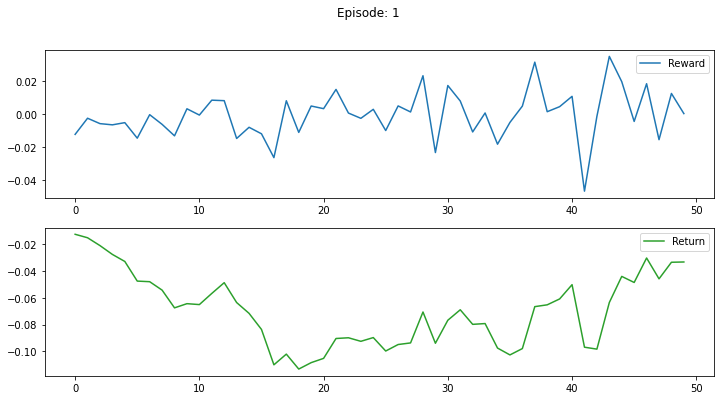


[+] Begin Episode: 2 of 3
  [1/False]: Reward: -0.00982317328453064
  [2/False]: Reward: 0.0010564029216766357
  [3/False]: Reward: -0.0003129541873931885
  [4/False]: Reward: -0.011427432298660278
  [5/False]: Reward: -0.013547569513320923
  [6/False]: Reward: -0.01853841543197632
  [7/False]: Reward: -0.0030119121074676514
  [8/False]: Reward: -0.014224648475646973
  [9/False]: Reward: -0.000993192195892334
  [10/False]: Reward: -0.011798053979873657
  [11/False]: Reward: 0.011787891387939453
  [12/False]: Reward: -0.00962364673614502
  [13/False]: Reward: 0.009798884391784668
  [14/False]: Reward: -0.011482417583465576
  [15/False]: Reward: 0.005837053060531616
  [16/False]: Reward: 0.002791166305541992
  [17/False]: Reward: 0.024458259344100952
  [18/False]: Reward: 0.000618278980255127
  [19/False]: Reward: 0.001581341028213501
  [20/False]: Reward: -0.0065500736236572266
  [21/False]: Reward: 0.006621658802032471
  [22/False]: Reward: -0.008150279521942139
  [23/False]: Reward: 

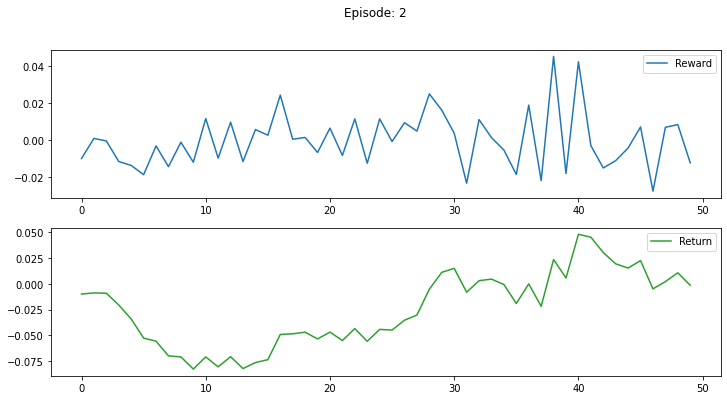


[+] Begin Episode: 3 of 3
  [1/False]: Reward: -0.01772889494895935
  [2/False]: Reward: 0.01342037320137024
  [3/False]: Reward: -0.008683443069458008
  [4/False]: Reward: -0.010203421115875244
  [5/False]: Reward: -0.021947354078292847
  [6/False]: Reward: -0.003812551498413086
  [7/False]: Reward: 0.015035688877105713
  [8/False]: Reward: -0.0211106538772583
  [9/False]: Reward: 0.002825617790222168
  [10/False]: Reward: -0.01871904730796814
  [11/False]: Reward: -0.0002530515193939209
  [12/False]: Reward: -0.0037693381309509277
  [13/False]: Reward: 0.013307422399520874
  [14/False]: Reward: 0.002518951892852783
  [15/False]: Reward: 0.02294906973838806
  [16/False]: Reward: -0.040417611598968506
  [17/False]: Reward: 0.05702027678489685
  [18/False]: Reward: -0.043503016233444214
  [19/False]: Reward: 0.03199934959411621
  [20/False]: Reward: 0.015136241912841797
  [21/False]: Reward: -0.007071763277053833
  [22/False]: Reward: -0.005591869354248047
  [23/False]: Reward: 0.00144

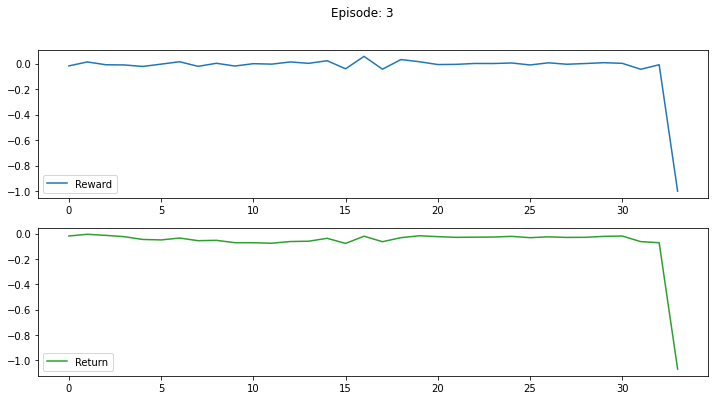

[RenderHandler]:: Stopped Video @ [./testAgent_ppo_run.avi]
[--] End Epoch [3] episodes :: Avg Return: -0.36849045753479004, Total Steps: 134.0


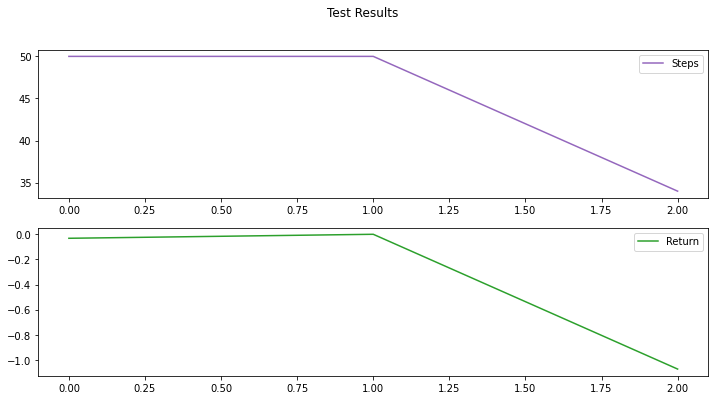

(-0.36849045753479004, 134.0)

In [5]:
agent(  test=True, 
        enable_history=False,   #<----- enable record_history flag (per episode)
        episodes=3,                     #<----- total no of episodes
        steps=50,                       #<----- steps per episodes (0 for inifite horizon - i.e. untill is_done returns true)
        deterministic=False,             #<----- arg for model.predict()
        render_mode='all',              #<----- render_mode = all, env, sen, rew  (keep blank for no rendering)
        save_fig='run',                 #<----- figure directory for saving test run
        save_dpi='figure',                    #<----- dpi to use for saved images/video - 'figure' means use fig's dpi (as define in Agent.render_dpi )
        make_video=True                 #<----- if True, compiles a video of all rendered frames
        )

### Random Testing

In [ ]:
fb.TEST( env=envF(False, False),
        model=None,
        episodes=2,                     #<----- total no of episodes
        steps=10,                       #<----- steps per episodes (0 for inifite horizon - i.e. untill is_done returns true)
        deterministic=False,             #<----- arg for model.predict()
        render_mode='rew',              #<----- render_mode = all, env, sen, rew  (keep blank for no rendering)
        save_fig='run',                 #<----- figure directory for saving test run
        save_dpi='figure',                    #<----- dpi to use for saved images/video - 'figure' means use fig's dpi (as define in Agent.render_dpi )
        make_video=True                 #<----- if True, compiles a video of all rendered frames
        )